In [19]:
import scanpy as sc
import pandas as pd

In [2]:
mes = sc.read_h5ad("../../processed_data/integrated_data/20241118_mes.h5ad")

In [32]:
mes_pseudo = pd.read_csv("../../processed_data/trajectory/20241124_pseudotime_predicted.csv",index_col=0)
mes = mes[mes_pseudo.index].copy()

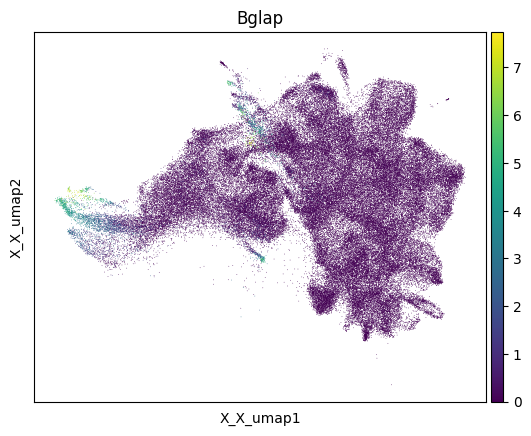

In [35]:
sc.pl.embedding(mes,color="Bglap",basis="X_X_umap",use_raw=False)

In [36]:
mes

AnnData object with n_obs × n_vars = 110648 × 36303
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology', 'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development.stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal', 'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 'leiden_

In [13]:
mes.obs["Sample"] = mes.obs["Sample"].astype('category')

In [37]:
sc.pp.highly_variable_genes(mes, n_top_genes=5000, batch_key="Sample")

/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:383: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)


In [38]:
mesVar = mes.var_names[mes.var["highly_variable"]]

In [39]:
mesVarPd = pd.DataFrame(mesVar)

In [22]:
!mkdir ../../processed_data/framework/hvg

In [40]:
mesVarPd.to_csv("../../processed_data/framework/20250108_hvg.csv")

In [24]:
epi = sc.read_h5ad("../../processed_data/integrated_data/20241024_epithelium.h5ad")

In [28]:
epi.X = epi.layers["logcounts"]

In [31]:
epi.X[0:10,0:10].toarray()

array([[0.        , 0.        , 1.17608241, 0.        , 0.        ,
        1.17608241, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.52653088, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.69808347, 0.        , 0.        ,
        0.69808347, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.7563953 , 0.        , 0.        ,
        0.7563953 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.96486428, 0.59455025, 0.        ,
        0.96486428, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.77643489, 0.        , 0.        ,
        0.77643489, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.80384331, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [33]:
sc.pp.log1p(epi)

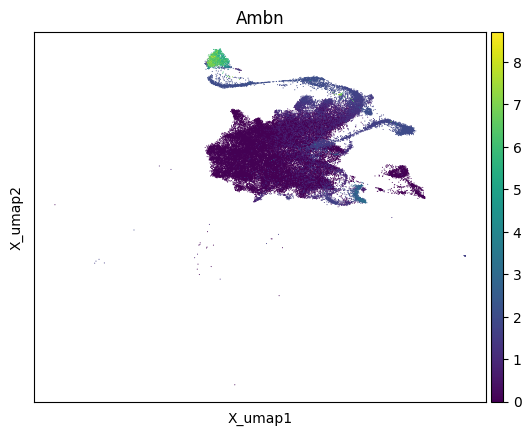

In [34]:
sc.pl.embedding(epi,color="Ambn",basis="X_umap",use_raw=False)

In [41]:
epi_pseudo = pd.read_csv("../../process/lzs_results/20250106_pseudotime.csv",index_col = 0)


In [43]:
sc.pp.highly_variable_genes(epi, n_top_genes=5000, batch_key="Sample")

In [44]:
epiVar = epi.var_names[epi.var["highly_variable"]]

In [46]:
epiVarPd = pd.DataFrame(epiVar)
epiVarPd.to_csv("../../processed_data/framework/20250108_hvgEpi.csv")

In [47]:
dpt = sc.read_h5ad("/home/gilberthan/Desktop/disk1/limb/important_processed_data/11.16_dpt.h5ad")

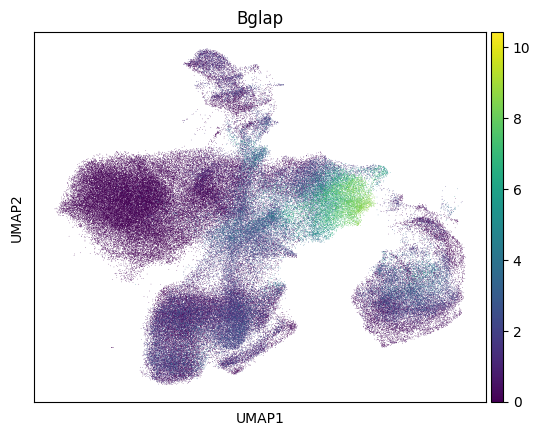

In [50]:
sc.pl.umap(dpt,color="Bglap",use_raw=False)

In [51]:
sc.pp.highly_variable_genes(dpt, n_top_genes=5000, batch_key="batch")

In [52]:
boneVar = dpt.var_names[dpt.var["highly_variable"]]

In [53]:
boneVarPd = pd.DataFrame(boneVar)
boneVarPd.to_csv("../../processed_data/framework/20250108_hvgBone.csv")